In [ ]:
%matplotlib inline
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
plt.style.use('ggplot')
import math
from matplotlib.pylab import rcParams
import seaborn as sns # for making plots with seaborn
color = sns.color_palette()
sns.set(rc={'figure.figsize':(25,15)})

import plotly
# connected=True means it will download the latest version of plotly javascript library.
plotly.offline.init_notebook_mode(connected=True)
import plotly.graph_objs as go

import plotly.figure_factory as ff
import cufflinks as cf


import warnings
warnings.filterwarnings('ignore')

plt.style.use('ggplot') # to plot graphs with gggplot2 style

In [9]:
datastocks= pd.read_csv('saham.csv')

In [6]:
#Importing the auxiliar and preprocessing library
import sklearn
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, confusion_matrix, roc_auc_score, matthews_corrcoef, f1_score
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import train_test_split, KFold, cross_validate
from sklearn.metrics import accuracy_score

#Models
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.linear_model import RidgeClassifier, LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier, BaggingClassifier, VotingClassifier, RandomTreesEmbedding

                                 Date    High     Low    Open   Close  \
Date                                                                    
1970-01-01 00:00:00.000719163  719163   835.0   825.0   835.0   825.0   
1970-01-01 00:00:00.000719163  719163   825.0   810.0   825.0   825.0   
1970-01-01 00:00:00.000719163  719163   830.0   825.0   825.0   830.0   
1970-01-01 00:00:00.000719163  719163   845.0   825.0   830.0   840.0   
1970-01-01 00:00:00.000719163  719163   880.0   845.0   845.0   870.0   
1970-01-01 00:00:00.000719163  719163   880.0   870.0   870.0   880.0   
1970-01-01 00:00:00.000719163  719163   880.0   855.0   880.0   860.0   
1970-01-01 00:00:00.000719163  719163   860.0   850.0   860.0   855.0   
1970-01-01 00:00:00.000719163  719163   860.0   845.0   850.0   855.0   
1970-01-01 00:00:00.000719163  719163   870.0   855.0   855.0   870.0   
1970-01-01 00:00:00.000719163  719163   870.0   845.0   870.0   855.0   
1970-01-01 00:00:00.000719163  719163   870.0   850

        Date Close
0     719163   825
1     719163   825
2     719163   830
3     719163   840
4     719163   870
5     719163   880
6     719163   860
7     719163   855
8     719163   855
9     719163   870
10    719163   855
11    719163   870
12    719163   860
13    719163   860
14    719163   855
15    719163   880
16    719163   865
17    719163   850
18    719163   870
19    719163   860
20    719163   835
21    719163   840
22    719163   860
23    719163   870
24    719163   870
25    719163   915
26    719163   945
27    719163   920
28    719163   930
29    719163   925
...      ...   ...
3523  719163  3930
3524  719163  3820
3525  719163  3790
3526  719163  3740
3527  719163  3790
3528  719163  3900
3529  719163  3920
3530  719163  3870
3531  719163  3870
3532  719163  3840
3533  719163  3910
3534  719163  3930
3535  719163  3910
3536  719163  3860
3537  719163  3910
3538  719163  3850
3539  719163  3870
3540  719163  3820
3541  719163  3820
3542  719163  3740
3543  719163

c:\users\raka\appdata\local\programs\python\python37\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning:

Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()



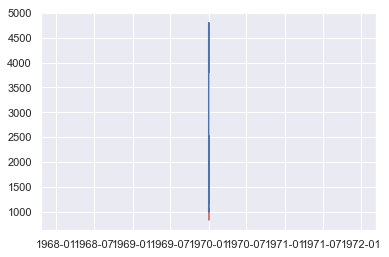

In [25]:
datastockss = pd.DataFrame(datastocks)

#setting index as date values
datastockss['Date'] = pd.to_datetime(datastockss.Date,format='%Y-%m-%d')
datastockss.index = datastockss['Date']
datastockss['Datecadangan'] = datastockss['Date']
datastockss['Date'] = datastockss['Date'].map(dt.datetime.toordinal)
print(datastockss)

# print(datastockss['Date'])

#sorting
data = datastockss.sort_index(ascending=True, axis=0)

#creating a separate dataset
new_data = pd.DataFrame(index=range(0,len(datastockss)),columns=['Date', 'Close'])

for i in range(0,len(data)):
    new_data['Date'][i] = data['Date'][i]
    new_data['Close'][i] = data['Close'][i]

# new_data['mon_fri'] = 0
# for i in range(0,len(new_data)):
#     if (new_data['Dayofweek'][i] == 0 or new_data['Dayofweek'][i] == 4):
#         new_data['mon_fri'][i] = 1
#     else:
#         new_data['mon_fri'][i] = 0

#split into train and validation
train = new_data[:987]
valid = new_data[987:]
print(new_data)
x_train = train.drop('Close', axis=1)
y_train = train['Close']
x_valid = valid.drop('Close', axis=1)
y_valid = valid['Close']

# from sklearn.model_selection import train_test_split
# x_train, x_tes, y_train, y_tes = train_test_split(
#     new_data.drop('Close', axis=1),
#     new_data['Close'],
#     test_size = .2
# )

#implement linear regression
from sklearn.linear_model import LinearRegression
model = LinearRegression()
# x_train = str(x_train)
# print(x_train.reshape(-1,1))
# print(y_train)
model.fit(x_train, y_train)

#make predictions and find the rmse
preds = model.predict(x_valid)
rms=np.sqrt(np.mean(np.power((np.array(y_valid)-np.array(preds)),2)))
print(rms)

#plot
valid['Predictions'] = 0
valid['Predictions'] = preds
new_data.index = datastockss['Datecadangan']
valid.index = new_data[987:].index
train.index = new_data[:987].index

print(new_data)

plt.plot(train['Close'],color='r')
# plt.plot(valid[['Close', 'Predictions']])
plt.plot(valid['Close'],color='b')
plt.plot(valid['Predictions'],color='g')
# plt.show()
# print(train['Close'])
# print(datastockss.index.values)
waktu = datastockss.index.year.values
# print(waktu)
# plt.xticks(valid[['Close', 'Predictions']],waktu,rotation = 90)
# plt.xticks(train['Close'].index.values,waktu[:987],rotation = 90)
# plt.xticks(valid['Close'].index.values,waktu[987:],rotation = 90)
# print(train['Close'])
# print(valid['Close'])
# print(train['Close'])
# print(datastockss)
plt.show()